In [ ]:
import pandas as pd
import hiplot as hip
import seaborn as sns
#data = pd.read_csv('data/100kdata.csv')


In [ ]:
df = pd.DataFrame(data)
#print out type of df
print(type(df))

In [ ]:
#remove all columns that have names that contain Avg, Min, Max, Std, Mean, Tot
df = df[df.columns.drop(list(df.filter(regex='Avg')))]
df = df[df.columns.drop(list(df.filter(regex='Min')))]
df = df[df.columns.drop(list(df.filter(regex='Max')))]
df = df[df.columns.drop(list(df.filter(regex='Std')))]
df = df[df.columns.drop(list(df.filter(regex='Mean')))]
df = df[df.columns.drop(list(df.filter(regex='Tot')))]
df = df[df.columns.drop(list(df.filter(regex='Flag')))]
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df = df[df.columns.drop(list(df.filter(regex='Byts')))]

exp = hip.Experiment.from_dataframe(df).display()
import matplotlib.pyplot as plt
#plot exp using matplotlib
exp.plot()

In [ ]:
data = pd.read_csv('data/final_dataset.csv')
#how many values are 0 in each column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
#(data == 0).astype(int).sum(axis=0)
#view as a percentage
#((data == 0).astype(int).sum(axis=0)/len(data))*100
#percentage of values that are na or inf in each column
data.isna().sum()/len(data)*100

#values that are all 0:
#Fwd Byts/b Avg       100.000000
#Fwd Pkts/b Avg       100.000000
#Fwd Blk Rate Avg     100.000000
#Bwd Byts/b Avg       100.000000
#Bwd Pkts/b Avg       100.000000
#Bwd Blk Rate Avg     100.000000
#Fwd URG Flags        100.000000
#Bwd URG Flags        100.000000



In [ ]:
#count the number of unique values in each column
data.nunique()
#Fwd Byts/b Avg             1
#Fwd Pkts/b Avg             1
#Fwd Blk Rate Avg           1
#Bwd Byts/b Avg             1
#Bwd Pkts/b Avg             1
#Bwd Blk Rate Avg           1

In [ ]:
#create a linerar regression model using sklearn to predict the label
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_Flags = pd.read_csv('data/Flags_subset.csv')
df_Flags = df_Flags.drop(columns=['Unnamed: 0'])
df_Flags = df_Flags.drop(columns=['Timestamp'])
#convert the label to a binary value
df_Flags['Label'] = df_Flags['Label'].map({'Benign': 0, 'ddos': 1})

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_Flags.drop(columns=['Label']), df_Flags['Label'], test_size=0.2, random_state=42)
#subset by time first 1min, 2min, 3min, 4min, 5min ...
#fit the model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the labels
y_pred = model.predict(X_test)

#evaluate the model
from sklearn.metrics import mean_squared_error
#mean_squared_error(y_test, y_pred)

#plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')







In [ ]:
#plot the residuals
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [ ]:
#evaluate the model 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)



In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
#r squared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
df_Flow = pd.read_csv('data/Flow_subset.csv')
df_Flow = df_Flow.drop(columns=['Unnamed: 0'])
df_Flow = df_Flow.drop(columns=['Timestamp'])
df_Flow = df_Flow.drop(columns=['Flow ID'])
#convert the label to a binary value
df_Flow['Label'] = df_Flow['Label'].map({'Benign': 0, 'ddos': 1})




In [ ]:
#graph the nans and inf values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df_Flow_copy = df_Flow.copy()
#if the value is na set to 1, if inf set to 2 else set to 0
for col in df_Flow_copy.columns:
    df_Flow_copy[col] = df_Flow_copy[col].apply(lambda x: 1 if pd.isna(x) else 2 if np.isinf(x) else 0)
sns.heatmap(df_Flow_copy)


In [ ]:
#how many nan values are in each column
df_Flow.isna().sum()/len(df_Flow)*100



In [ ]:
#df_Flow = df_Flow.drop(columns=['Flow Byts/s']) #removed to many nan values

In [ ]:
import numpy as np
#how many inf values are in each column
df_Flow.isin([np.inf, -np.inf]).sum()/len(df_Flow)*100

In [ ]:
#remove nan and inf values
df_Flow = df_Flow.replace([np.inf, -np.inf], np.nan)
df_Flow = df_Flow.dropna()


In [ ]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_Flow.drop(columns=['Label']), df_Flow['Label'], test_size=0.2, random_state=42)

#fit the model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the labels
y_pred = model.predict(X_test)

#evaluate the model
mean_squared_error(y_test, y_pred)

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
df_Byts = pd.read_csv('data/Byts_subset.csv')
df_Byts.isna().sum()/len(df_Byts)*100

In [ ]:
#check for inf values
df_Byts.isin([np.inf, -np.inf]).sum()/len(df_Byts)*100

In [ ]:
df_Byts = df_Byts.drop(columns=['Unnamed: 0'])

#drop inf
df_Byts = df_Byts.replace([np.inf, -np.inf], np.nan)
df_Byts = df_Byts.dropna()

In [ ]:
#convert the label to a binary value
df_Byts['Label'] = df_Byts['Label'].map({'Benign': 0, 'ddos': 1})

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_Byts.drop(columns=['Label']), df_Byts['Label'], test_size=0.2, random_state=42)

#fit the model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the labels
y_pred = model.predict(X_test)

#evaluate the model
mean_squared_error(y_test, y_pred)

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
df_Pkts = pd.read_csv('data/Pkts_subset.csv')
df_Pkts.isna().sum()/len(df_Pkts)*100

In [ ]:
df_Pkts.isin([np.inf, -np.inf]).sum()/len(df_Pkts)*100

In [ ]:
df_Pkts = df_Pkts.drop(columns=['Unnamed: 0'])
df_Pkts = df_Pkts.replace([np.inf, -np.inf], np.nan)
df_Pkts = df_Pkts.dropna()

In [ ]:
df_IAT = pd.read_csv('data/IAT_subset.csv')
df_IAT.isna().sum()/len(df_IAT)*100

In [ ]:
df_IAT.isin([np.inf, -np.inf]).sum()/len(df_IAT)*100

In [ ]:
df_Subflow = pd.read_csv('data/Subflow_subset.csv')
df_Subflow.isna().sum()/len(df_Subflow)*100

In [ ]:
df_Subflow.isin([np.inf, -np.inf]).sum()/len(df_Subflow)*100

In [ ]:
df_Flow_Subflow = pd.read_csv('data/Flow_Subflow_subset.csv')
df_Flow_Subflow.isna().sum()/len(df_Flow_Subflow)*100

In [ ]:
df_Flow_Subflow.isin([np.inf, -np.inf]).sum()/len(df_Flow_Subflow)*100

In [ ]:
df_Flow_Subflow = df_Flow_Subflow.drop(columns=['Unnamed: 0'])
df_Flow_Subflow = df_Flow_Subflow.replace([np.inf, -np.inf], np.nan)
df_Flow_Subflow = df_Flow_Subflow.dropna()


In [ ]:
df_Flow_Subflow['Label'] = df_Flow_Subflow['Label'].map({'Benign': 0, 'ddos': 1})

In [ ]:
#calcuate correlation between features
df_IAT.drop(columns=['Label']).corr()

In [ ]:
#graph the correlation between features using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df_IAT.drop(columns=['Label']).corr())





In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_flags.drop(columns=['Label']).corr())

In [ ]:
df_Flags = pd.read_csv('data/Flags_subset.csv')

#find number of nan values in each column
df_Flags.isna().sum()/len(df_Flags)*100
df_Flags = df_Flags.dropna()
df_Flags['Label'] = df_Flags['Label'].eq('ddos').mul(1)
#df_Flags.head()
df_Flags.isna().sum()/len(df_Flags)*100

In [ ]:
#use nearest neighbors to predict the label
from sklearn.neighbors import KNeighborsClassifier



df_Flags = df_Flags.drop(columns=['Unnamed: 0'])
df_Flags = df_Flags.dropna()

df_Flags['Label'] = df_Flags['Label'].eq('ddos').mul(1)

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_Flags.drop(columns=['Label']), df_Flags['Label'], test_size=0.2, random_state=42)

#fit the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

#predict the labels
y_pred = model.predict(X_test)

#evaluate the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)




In [ ]:
df = pd.read_csv('data/clean_dataset.csv')
df.head()

In [ ]:
#count unique values in each column
#show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.nunique()

In [13]:
#create a dataframe containing all the information to make a network graph plot visualizing the source and destination ip addresses
#with no duplicates of scource and destination pairs
import pandas as pd
df = pd.read_csv('data/final_dataset.csv')
df_network = df[['Src IP', 'Dst IP', 'Label']]
""" df_network = df_network.drop_duplicates()
df_network = df_network.reset_index(drop=True)
df_network.head() """
#remove duplicates but count them as weights
df_network['Weight'] = df_network.groupby(['Src IP', 'Dst IP'])['Label'].transform('count')
df_network = df_network.drop_duplicates()
df_network = df_network.reset_index(drop=True)
df_network.head()

/var/folders/96/kyv0s9t55tz6f5z7gyqd24640000gn/T/ipykernel_8944/577861079.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network['Weight'] = df_network.groupby(['Src IP', 'Dst IP'])['Label'].transform('count')


,Src IP,Dst IP,Label,Weight
0,192.168.4.118,203.73.24.75,ddos,149
1,192.168.1.103,208.113.162.153,ddos,542
2,192.168.1.103,97.74.144.108,ddos,124
3,192.168.1.103,69.192.24.88,ddos,22
4,192.168.2.108,74.55.1.4,ddos,685


In [18]:
df_network.shape

(695155, 4)

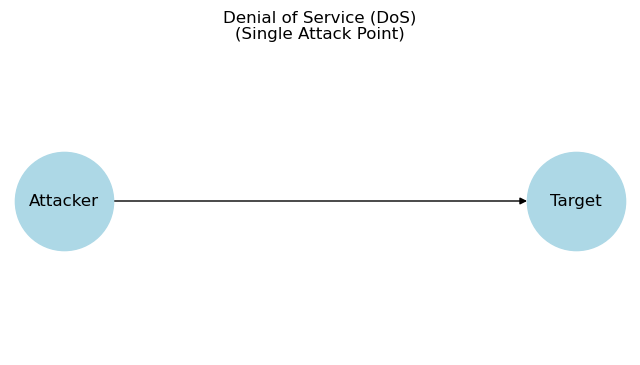

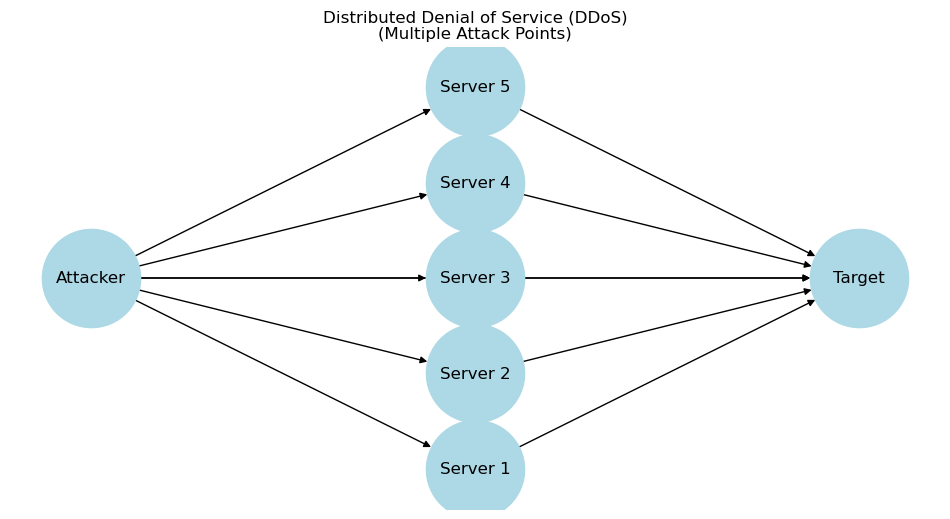

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

dos_graph = nx.DiGraph()
dos_graph.add_edge("Attacker", "Target")

ddos_graph = nx.DiGraph()
ddos_graph.add_edge("Attacker", "Target")

servers = ["Server 1", "Server 2", "Server 3", "Server 4", "Server 5"]
for server in servers:
    ddos_graph.add_edge("Attacker", server)
    ddos_graph.add_edge(server, "Target")

node_positions = {
    "Attacker": (0, 0.5),
    "Target": (1, 0.5),
}
for server in servers:
    node_positions[server] = (0.5, (servers.index(server) + 1) / (len(servers) + 1))

plt.figure(figsize=(8, 4))
plt.title("Denial of Service (DoS)\n(Single Attack Point)")
nx.draw(dos_graph, node_positions, with_labels=True, node_size=5000, node_color='lightblue')
plt.show()

plt.figure(figsize=(12, 6))
plt.title("Distributed Denial of Service (DDoS)\n(Multiple Attack Points)")
nx.draw(ddos_graph, node_positions, with_labels=True, node_size=5000, node_color='lightblue')
plt.show()


Text(0.5, 1.0, 'ddos')

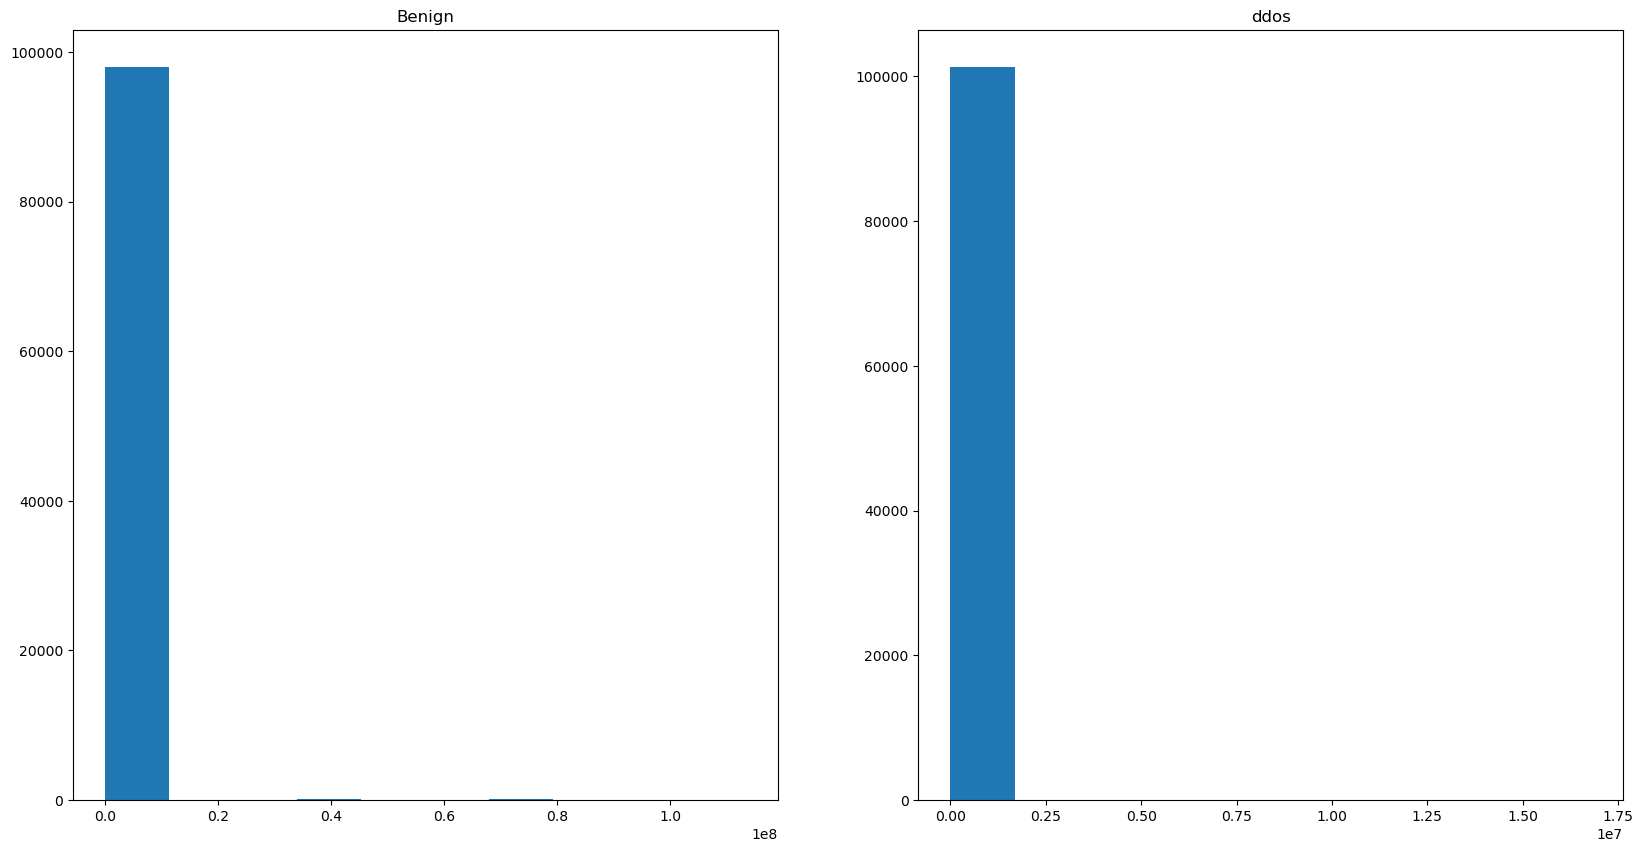

In [33]:
df = pd.read_csv('data/clean_dataset.csv')
#plot a histogram of Active Mean, Active Std, Active Max, Active Min
#make 2 histograms one for each label side by side
import matplotlib.pyplot as plt




Text(0.5, 1.0, 'ddos')

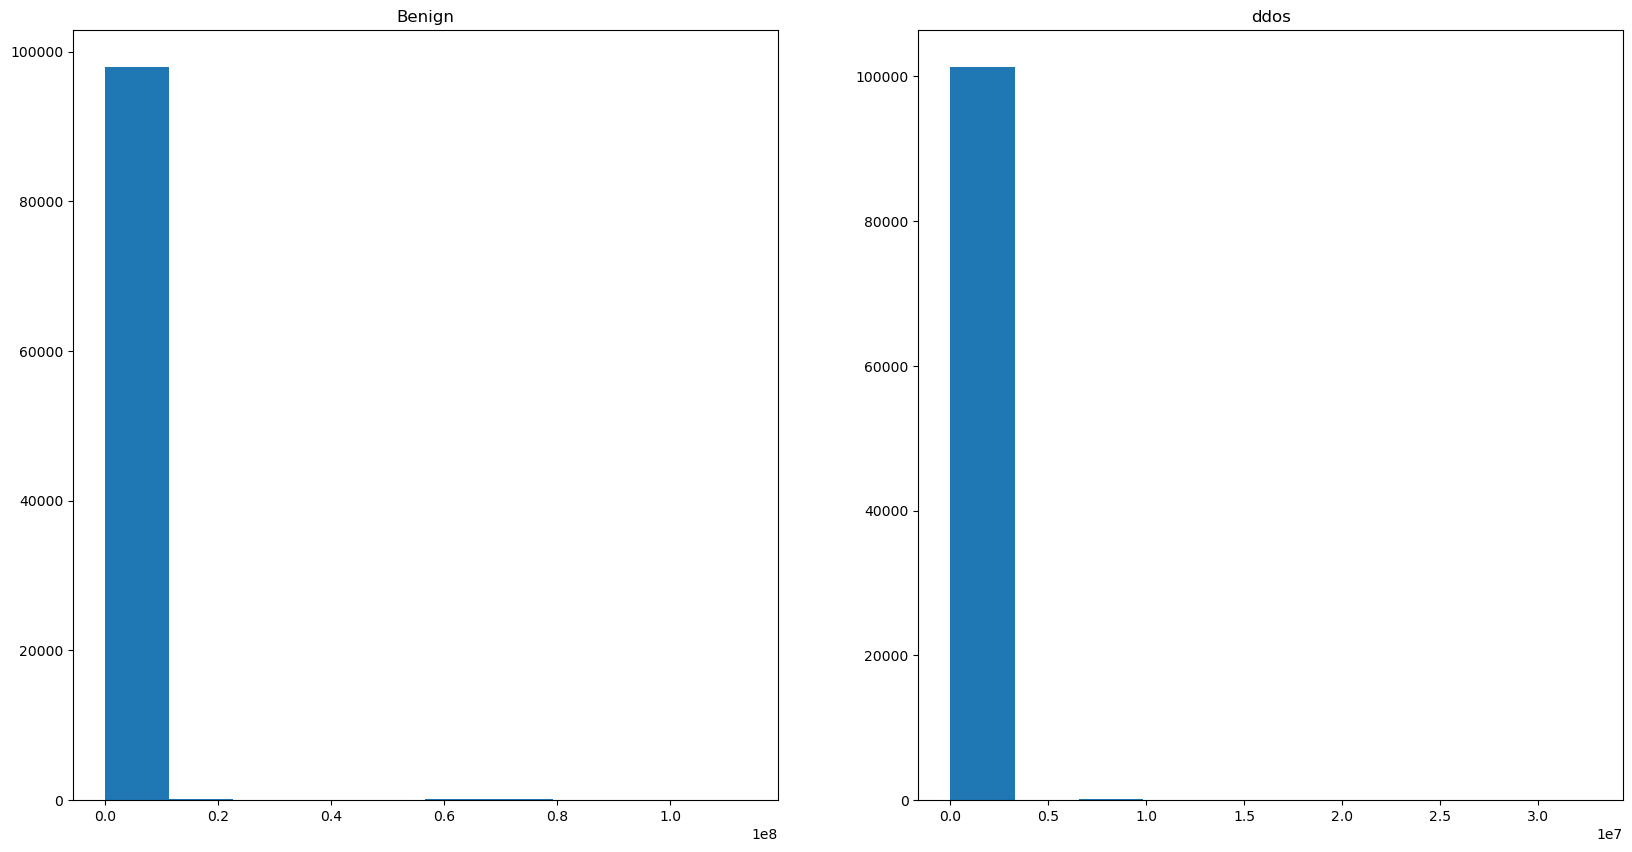

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(df[df['Label'] == 0]['Active Max'], bins=10)
plt.title('Benign')
plt.subplot(1,2,2)
plt.hist(df[df['Label'] == 1]['Active Max'], bins=10)
plt.title('ddos')

Text(0.5, 1.0, 'Down/Up Ratio vs Timestamp')

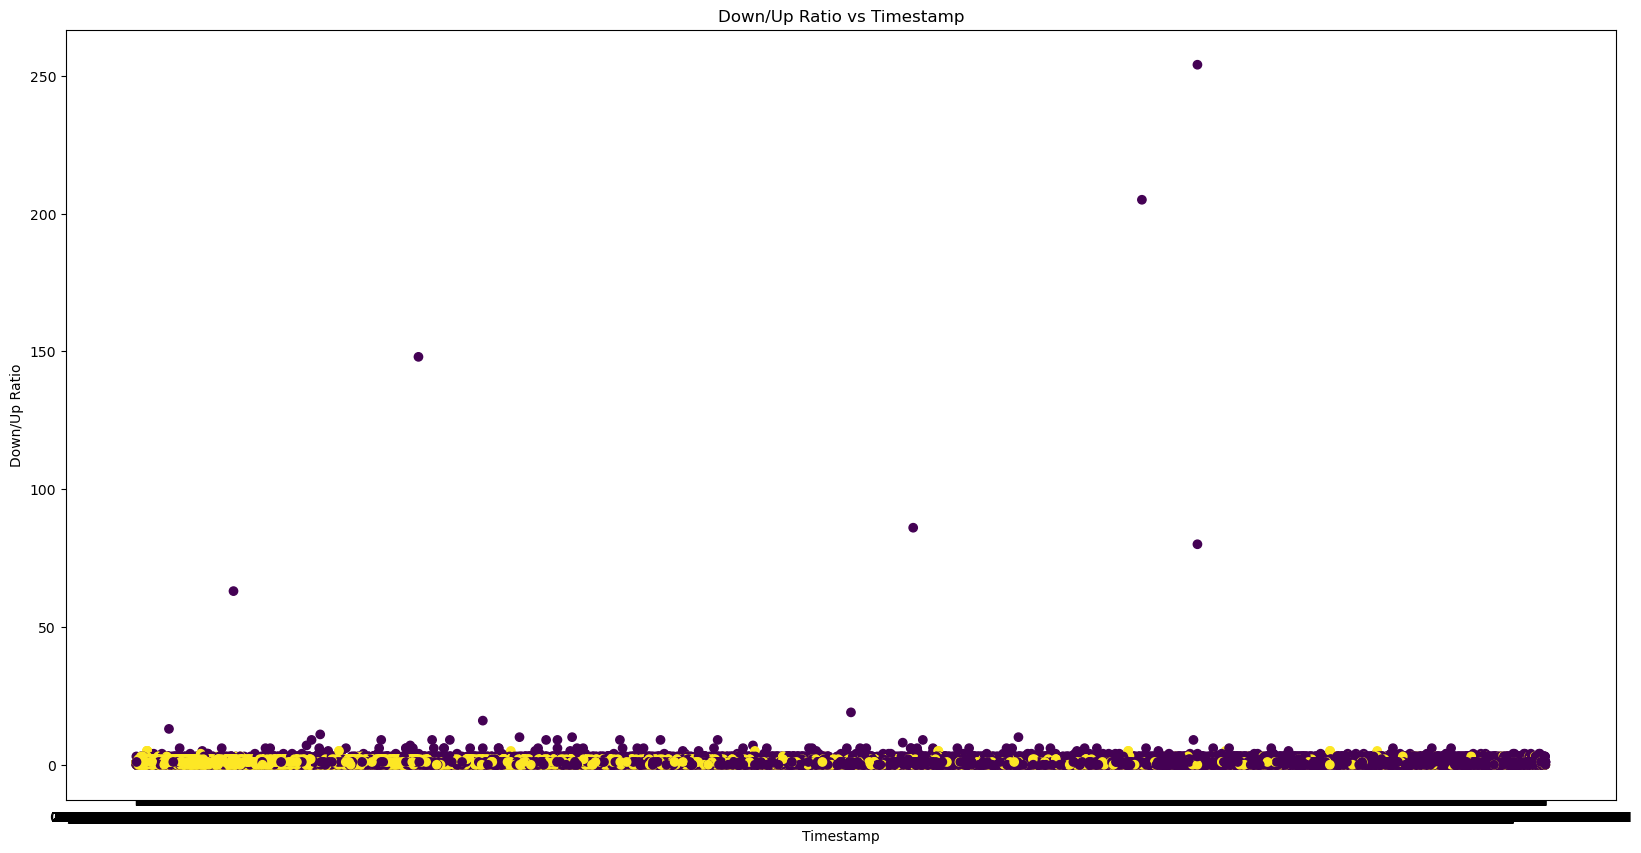

In [50]:
#plot Down/Up Ratio vs timestamp color coded by label
plt.figure(figsize=(20,10))
plt.scatter(df['Timestamp'], df['Down/Up Ratio'], c=df['Label'])
plt.xlabel('Timestamp')
plt.ylabel('Down/Up Ratio')
plt.title('Down/Up Ratio vs Timestamp')



Text(0.5, 1.0, 'ddos')

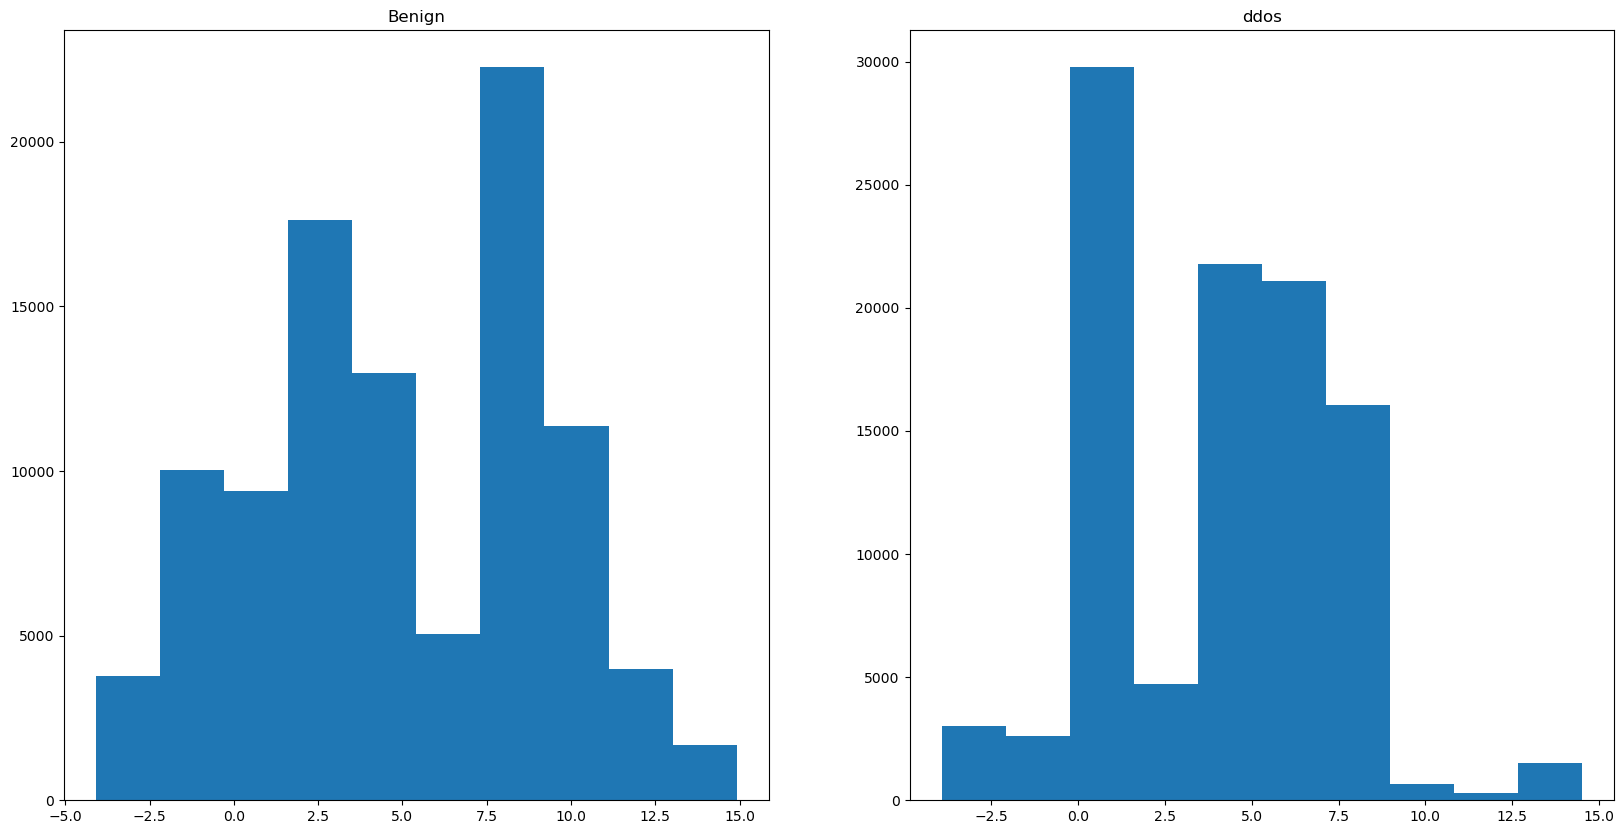

In [79]:
import numpy as np
#2 histograms of flow bytes split by attack and benign
#treat inf values as nan and drop them
#use a log scale
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(np.log(df[df['Label'] == 0]['Flow Pkts/s']).replace([np.inf, -np.inf], np.nan))
plt.title('Benign')
plt.subplot(1,2,2)
plt.hist(np.log(df[df['Label'] == 1]['Flow Pkts/s']).replace([np.inf, -np.inf], np.nan))
plt.title('ddos')




In [69]:
df[df['Label'] == 1]['Flow Pkts/s'].describe()

count    1.015220e+05
mean     1.326031e+04
std      1.027790e+05
min      1.979407e-02
25%      1.911527e+00
50%      7.018447e+01
75%      8.357710e+02
max      2.000000e+06
Name: Flow Pkts/s, dtype: float64